In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [78]:
df=pd.read_csv("instagram.csv")

In [79]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [80]:
df.shape

(100, 8)

In [81]:
df.drop(['S.No','Unnamed: 0'],axis=1,inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Followers,100.0,961.96,1014.62567,11.0,252.75,612.0,1197.0,4496.0
Likes,100.0,46.48,55.08698,8.0,19.00,29.0,46.0,349.0


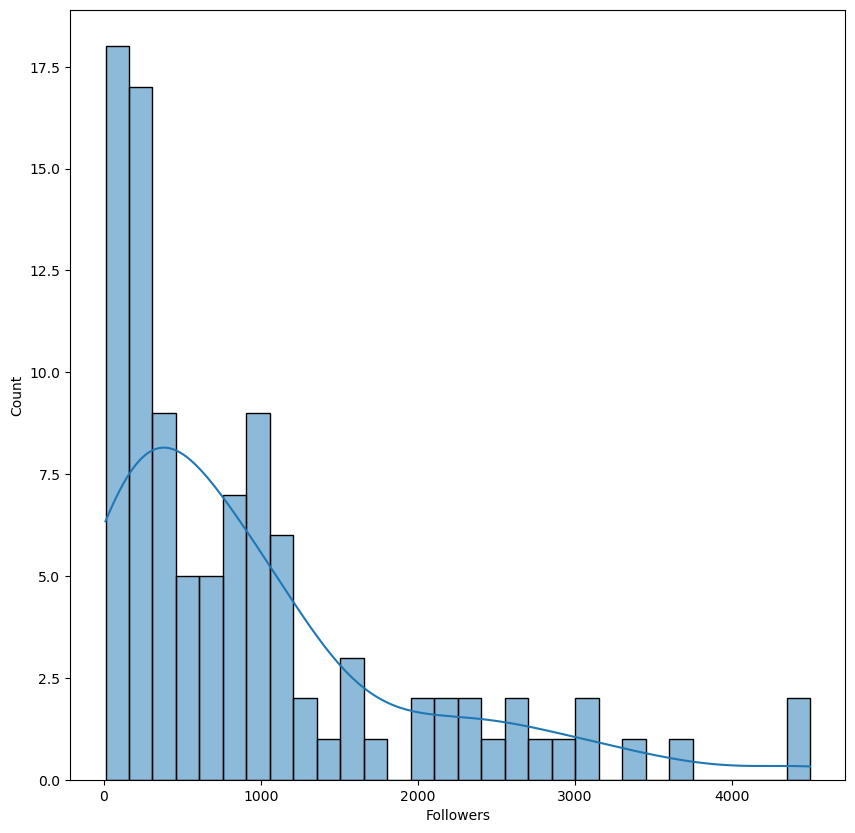

In [84]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x='Followers', bins=30, kde=True)
plt.show()

In [85]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df['USERNAME']=encoder.fit_transform(df['USERNAME'])
df['Caption']=encoder.fit_transform(df['Caption'])
df['Hashtags']=encoder.fit_transform(df['Hashtags'])
df['Time since posted'] = df['Time since posted'].str.extract('(\d+)').astype(int)


In [86]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,64,86,1600,17,11,139
1,29,82,880,97,2,23
2,3,13,255,87,2,25
3,71,89,340,65,3,49
4,23,30,304,64,3,30


In [87]:
from sklearn.model_selection import train_test_split 

X,y=df.drop(['Time since posted'],axis=1),df['Time since posted']
X_train,X_test,y_train,y_test   =train_test_split (X,y,test_size=0.2,random_state=100)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [89]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [90]:
def evaluate_model(true, predict):
    r2=r2_score(true, predict)
    mae=mean_absolute_error(true,predict)
    mse=mean_squared_error(true,predict)
    return r2, mae,mse,

In [91]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor()
}

In [92]:
for i in range(len(models)):
    model=list((models.values()))[i]
    print(model)
r2_list=[]

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()


In [93]:
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    R2,MAE,MSE=evaluate_model(y_test,y_pred)
    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)
    r2_list.append(R2)
    print("\n")

model training performance LinearRegression()
MSE: 2.658829582261197
MAE: 1.1891479161785647
R2 SCORE: -0.4391499768666829


model training performance Lasso()
MSE: 2.497532069283957
MAE: 1.139337503667024
R2 SCORE: -0.3518441511685826


model training performance Ridge()
MSE: 2.65879539908838
MAE: 1.189137773694623
R2 SCORE: -0.43913147447273615


model training performance ElasticNet()
MSE: 2.5747315694450186
MAE: 1.1636418982975072
R2 SCORE: -0.3936300781840425


model training performance RandomForestRegressor()
MSE: 3.7997150000000004
MAE: 1.2075
R2 SCORE: -1.056679296346414


